# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [44]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



The categorical data need to be one-hot encoded and the the 'y' column needs to be mapped to a binary 1/0 column

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective here to find a model that can explain the success of a contact (whether or not the client
subscribes to the deposit). This will help marketing campaign efficiency by identifying the main characteristics
that effect the success of a campaign and helping to better manage limited resources around the set of customers
most likely to purchase the deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [20]:
bank_features = df.iloc[:,0:7]

In [131]:
#i will create the transformer here to use in the Pipeline later
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop='if_binary'), selector),
                                     remainder=StandardScaler())

In [24]:
y = df['y'].map({'no':0, 'yes':1})
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

<AxesSubplot:>

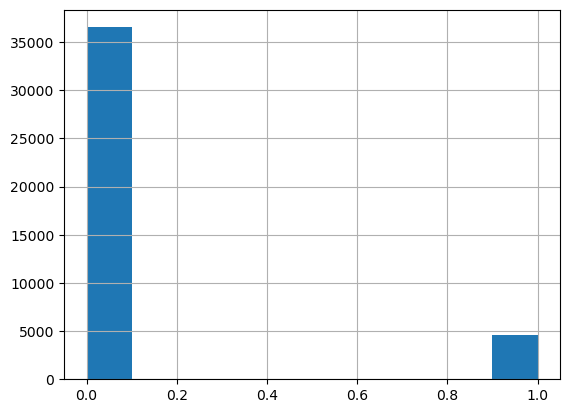

In [179]:
y.hist()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [135]:
X_train, X_test, y_train, y_test, = train_test_split(bank_features, y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [30]:
dummy_model = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_model.score(X_test, y_test)

In [31]:
print(f'The baseline performance that our classifier should beat is a test score of {baseline_score}')

The baseline performance that our classifier should beat is a test score of 0.8880256385354958


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [136]:
basic_lgr = Pipeline([
    ('transform', transformer),
    ('lgr', LogisticRegression())
])

start_time = time.time()
basic_lgr.fit(X_train, y_train)
log_time = time.time() - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [137]:
basic_lgr.score(X_test, y_test)

0.8880256385354958

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [138]:
basic_knn = Pipeline([
    ('transform', transformer),
    ('knn', KNeighborsClassifier())
])

basic_svm = Pipeline([
    ('transform', transformer),
    ('svm', SVC(max_iter=10000))
])

basic_tree = Pipeline([
    ('transform', transformer),
    ('tree', DecisionTreeClassifier())
])

start_time = time.time()
basic_knn.fit(X_train, y_train)
knn_time = time.time() - start_time

start_time = time.time()
basic_svm.fit(X_train, y_train)
svm_time = time.time() - start_time

start_time = time.time()
basic_tree.fit(X_train, y_train)
dtree_time = time.time() - start_time

In [139]:
models = [basic_lgr, basic_knn, basic_svm, basic_tree]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Decision Tree']
train_accs = []
test_accs = []
train_times = [log_time, knn_time, svm_time, dtree_time]

for model in models:
    train_accs.append(model.score(X_train, y_train))
    test_accs.append(model.score(X_test, y_test))

results_df = pd.DataFrame({'Model': model_names, 'Train Time': train_times, 
                          'Train Accuracy': train_accs, 'Test Accuracy': test_accs})

In [140]:
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.319552,0.887119,0.888026
1,K-Nearest Neighbors,0.089646,0.889062,0.876275
2,SVM,9.801499,0.887540,0.888220
3,Decision Tree,0.392647,0.916966,0.864232


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [141]:
X = df.drop(['duration', 'y'], axis=1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
numeric_selector = make_column_selector(dtype_include='number')
overall_transformer = make_column_transformer((OneHotEncoder(drop='if_binary'), selector),
                                              (StandardScaler(), numeric_selector),
                                              (PolynomialFeatures(include_bias=False, degree=2), numeric_selector))


In [156]:
lgr_pipe = Pipeline([
    ('transform', overall_transformer),
    ('feature_select', RFE(estimator=LinearRegression())),
    ('lgr', LogisticRegression(random_state=42, max_iter=10000))
])

lgr_params = {'lgr__multi_class': ['ovr', 'multinomial'],
             'lgr__C': [.001, 0.01, .05, 0.1, .5, 1],
             'feature_select__n_features_to_select': [2, 4, 8, 14, 20]}

knn_pipe = Pipeline([
    ('transform', overall_transformer),
    #('feature_select', RFE(estimator=LinearRegression())),
    ('knn', KNeighborsClassifier())
])

knn_params = {'knn__n_neighbors': [2,5,10,15,25,50,100,150,250],
              'knn__weights': ['uniform', 'distance'],
              'knn__p': [1, 2]}

svc_pipe = Pipeline([
    ('transform', transformer),
    ('svc', SVC(max_iter=10000))
])

svc_params = {'svc__kernel' : ['rbf', 'poly', 'linear', 'sigmoid'],
             'svc__gamma': [0.001,0.01, 0.1, 1.0, 10],
             'svc__C': [.01, .1, 1, 10]}

dtree_pipe = Pipeline([
    ('transform', overall_transformer), 
    ('dtree', DecisionTreeClassifier())
])

dtree_params = {'dtree__min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                 'dtree__max_depth': [2, 5, 10],
                 'dtree__min_samples_split': [0.1, 0.2, 0.05],
               }




In [152]:
lgr_grid = GridSearchCV(lgr_pipe, lgr_params).fit(X_train, y_train)

In [170]:
print(f'The optimal hyperparameters for the Logistic Regression model are \n{lgr_grid.best_params_}')

The optimal hyperparameters for the Logistic Regression model are 
{'feature_select__n_features_to_select': 14, 'lgr__C': 0.05, 'lgr__multi_class': 'ovr'}


In [105]:
dtree_grid = GridSearchCV(dtree_pipe, dtree_params).fit(X_train, y_train)

In [169]:
print(f'The optimal hyperparameters for the Decision Tree model are \n{dtree_grid.best_params_}')

The optimal hyperparameters for the Decision Tree model are 
{'dtree__max_depth': 2, 'dtree__min_impurity_decrease': 0.01, 'dtree__min_samples_split': 0.1}


In [127]:
knn_grid = GridSearchCV(knn_pipe, knn_params).fit(X_train, y_train)

In [168]:
print(f'The optimal hyperparameters for the K-Neighbors model are \n{knn_grid.best_params_}')

The optimal hyperparameters for the K-Neighbors model are 
{'knn__n_neighbors': 150, 'knn__p': 2, 'knn__weights': 'uniform'}


In [157]:
svc_grid = GridSearchCV(svc_pipe, svc_params).fit(X_train, y_train)

In [167]:
print(f'The optimal hyperparameters for the SVC model are \n{svc_grid.best_params_}')

The optimal hyperparameters for the SVC model are 
{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [172]:
models = [lgr_grid, knn_grid, svc_grid, dtree_grid]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Decision Tree']
train_accs = []
test_accs = []
train_times = []

for model in models:
    train_accs.append(model.best_estimator_.score(X_train, y_train))
    test_accs.append(model.best_estimator_.score(X_test, y_test))
    train_times.append(model.cv_results_['mean_fit_time'][model.best_index_])
    
final_results_df = pd.DataFrame({'Model': model_names, 'Train Time': train_times, 
                          'Train Accuracy': train_accs, 'Test Accuracy': test_accs})
final_results_df


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,3.271648,0.899906,0.899582
1,K-Nearest Neighbors,0.094661,0.899421,0.899582
2,SVM,18.185742,0.910265,0.900068
3,Decision Tree,0.155607,0.887119,0.888026


Examining the statistics of each of the 4 classifiers, a couple things stand out. First, the SVM model took an extremely long time to fit, about 193x the time of the K-Neighbors Classifier! The Logisitic Regression model also took quite a long time while the K-Neighbors classifier took the shortest. The Decision Tree model was also relatively quick. Also, while the SVM model had the highest training accuracy and the highest test accuracy, it was only marginally better than the K-Neighbors Classifier and the Logistic Regression model. Taking all things in to account, it seems like the K-Neighbors Classifier would be the best model for a marketing campaign to use when already constrained by limited resources. It fits to the training data extremely quickly, and maintains good accuracy when predicting. 

In [174]:
metric_scores = {
    'Recall Score': [recall_score(y_test, lgr_grid.best_estimator_.predict(X_test)),
                    recall_score(y_test, knn_grid.best_estimator_.predict(X_test)),
                    recall_score(y_test, svc_grid.best_estimator_.predict(X_test)),
                    recall_score(y_test, dtree_grid.best_estimator_.predict(X_test))],
    'Precision Score': [precision_score(y_test, lgr_grid.best_estimator_.predict(X_test)),
                       precision_score(y_test, knn_grid.best_estimator_.predict(X_test)),
                       precision_score(y_test, svc_grid.best_estimator_.predict(X_test)),
                       precision_score(y_test, dtree_grid.best_estimator_.predict(X_test))]
}

In [178]:
sum(dtree_grid.best_estimator_.predict(X_test))

0

In [177]:
metric_scores

{'Recall Score': [0.191673894189072,
  0.204683434518647,
  0.25065047701647875,
  0.0],
 'Precision Score': [0.6842105263157895,
  0.6685552407932012,
  0.6365638766519823,
  0.0]}

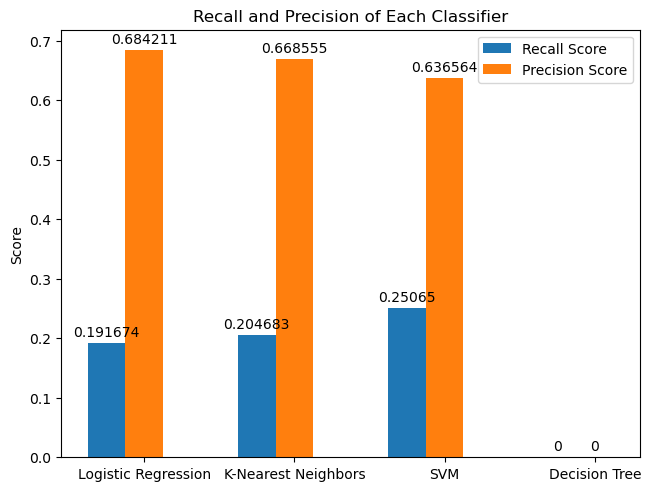

In [181]:
x = np.arange(len(model_names))
width = 0.25
multiplier = 0

fig,ax = plt.subplots(layout='constrained')

for metric, score in metric_scores.items():
    offset = width*multiplier
    rects = ax.bar(x+offset, score, width, label=metric)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Score')
ax.set_title('Recall and Precision of Each Classifier')
ax.legend(loc='upper right')
ax.set_xticks(x+width, model_names)


This is a very interesting plot as it shows that the Decision Tree is actually the same as the Dummy Classifier! It simply predicts a class of 0 for all test data. This is an issue that comes up with highly unbalanced classes and it seems like the Decision Tree Classifier is useless. Comparing the other 3 classifiers, it seems like the SVM classifier has the highest recall (meaning it correctly identified 25% of the clients who had subscribed to term deposits). On the other hand, it seems like the Logistic Regression model had the highest precision which means that of the clients that it predicted would subcribe to term deposits, 68.4% actually did. Looking at these numbers, it seems like the SVM model is the most effective for a marketing campaign in terms of identifying the highest number of clients that would subscribe to a term deposite. The other two model are too conservative in their prediction and classify a large number of subscribing clients and non-subscribing. 

##### Questions